1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

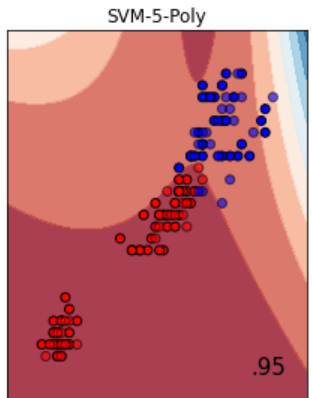

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# load iris dataset
X, y = datasets.load_iris(return_X_y=True)
# Take two features namely petal length (cm) and petal width (cm).
# Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) will be other class
y[:100]=0
y[100:150]=1
X = X[:,2:]
others=(X,y)
rng = np.random.RandomState(2)
X = X + 2 * rng.uniform(size=X.shape)   #we add noise to make it harder to separate linearly
linearly_separable = (X, y)

others_datasets =[
            others,
            linearly_separable,
]

others

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [3]:

def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

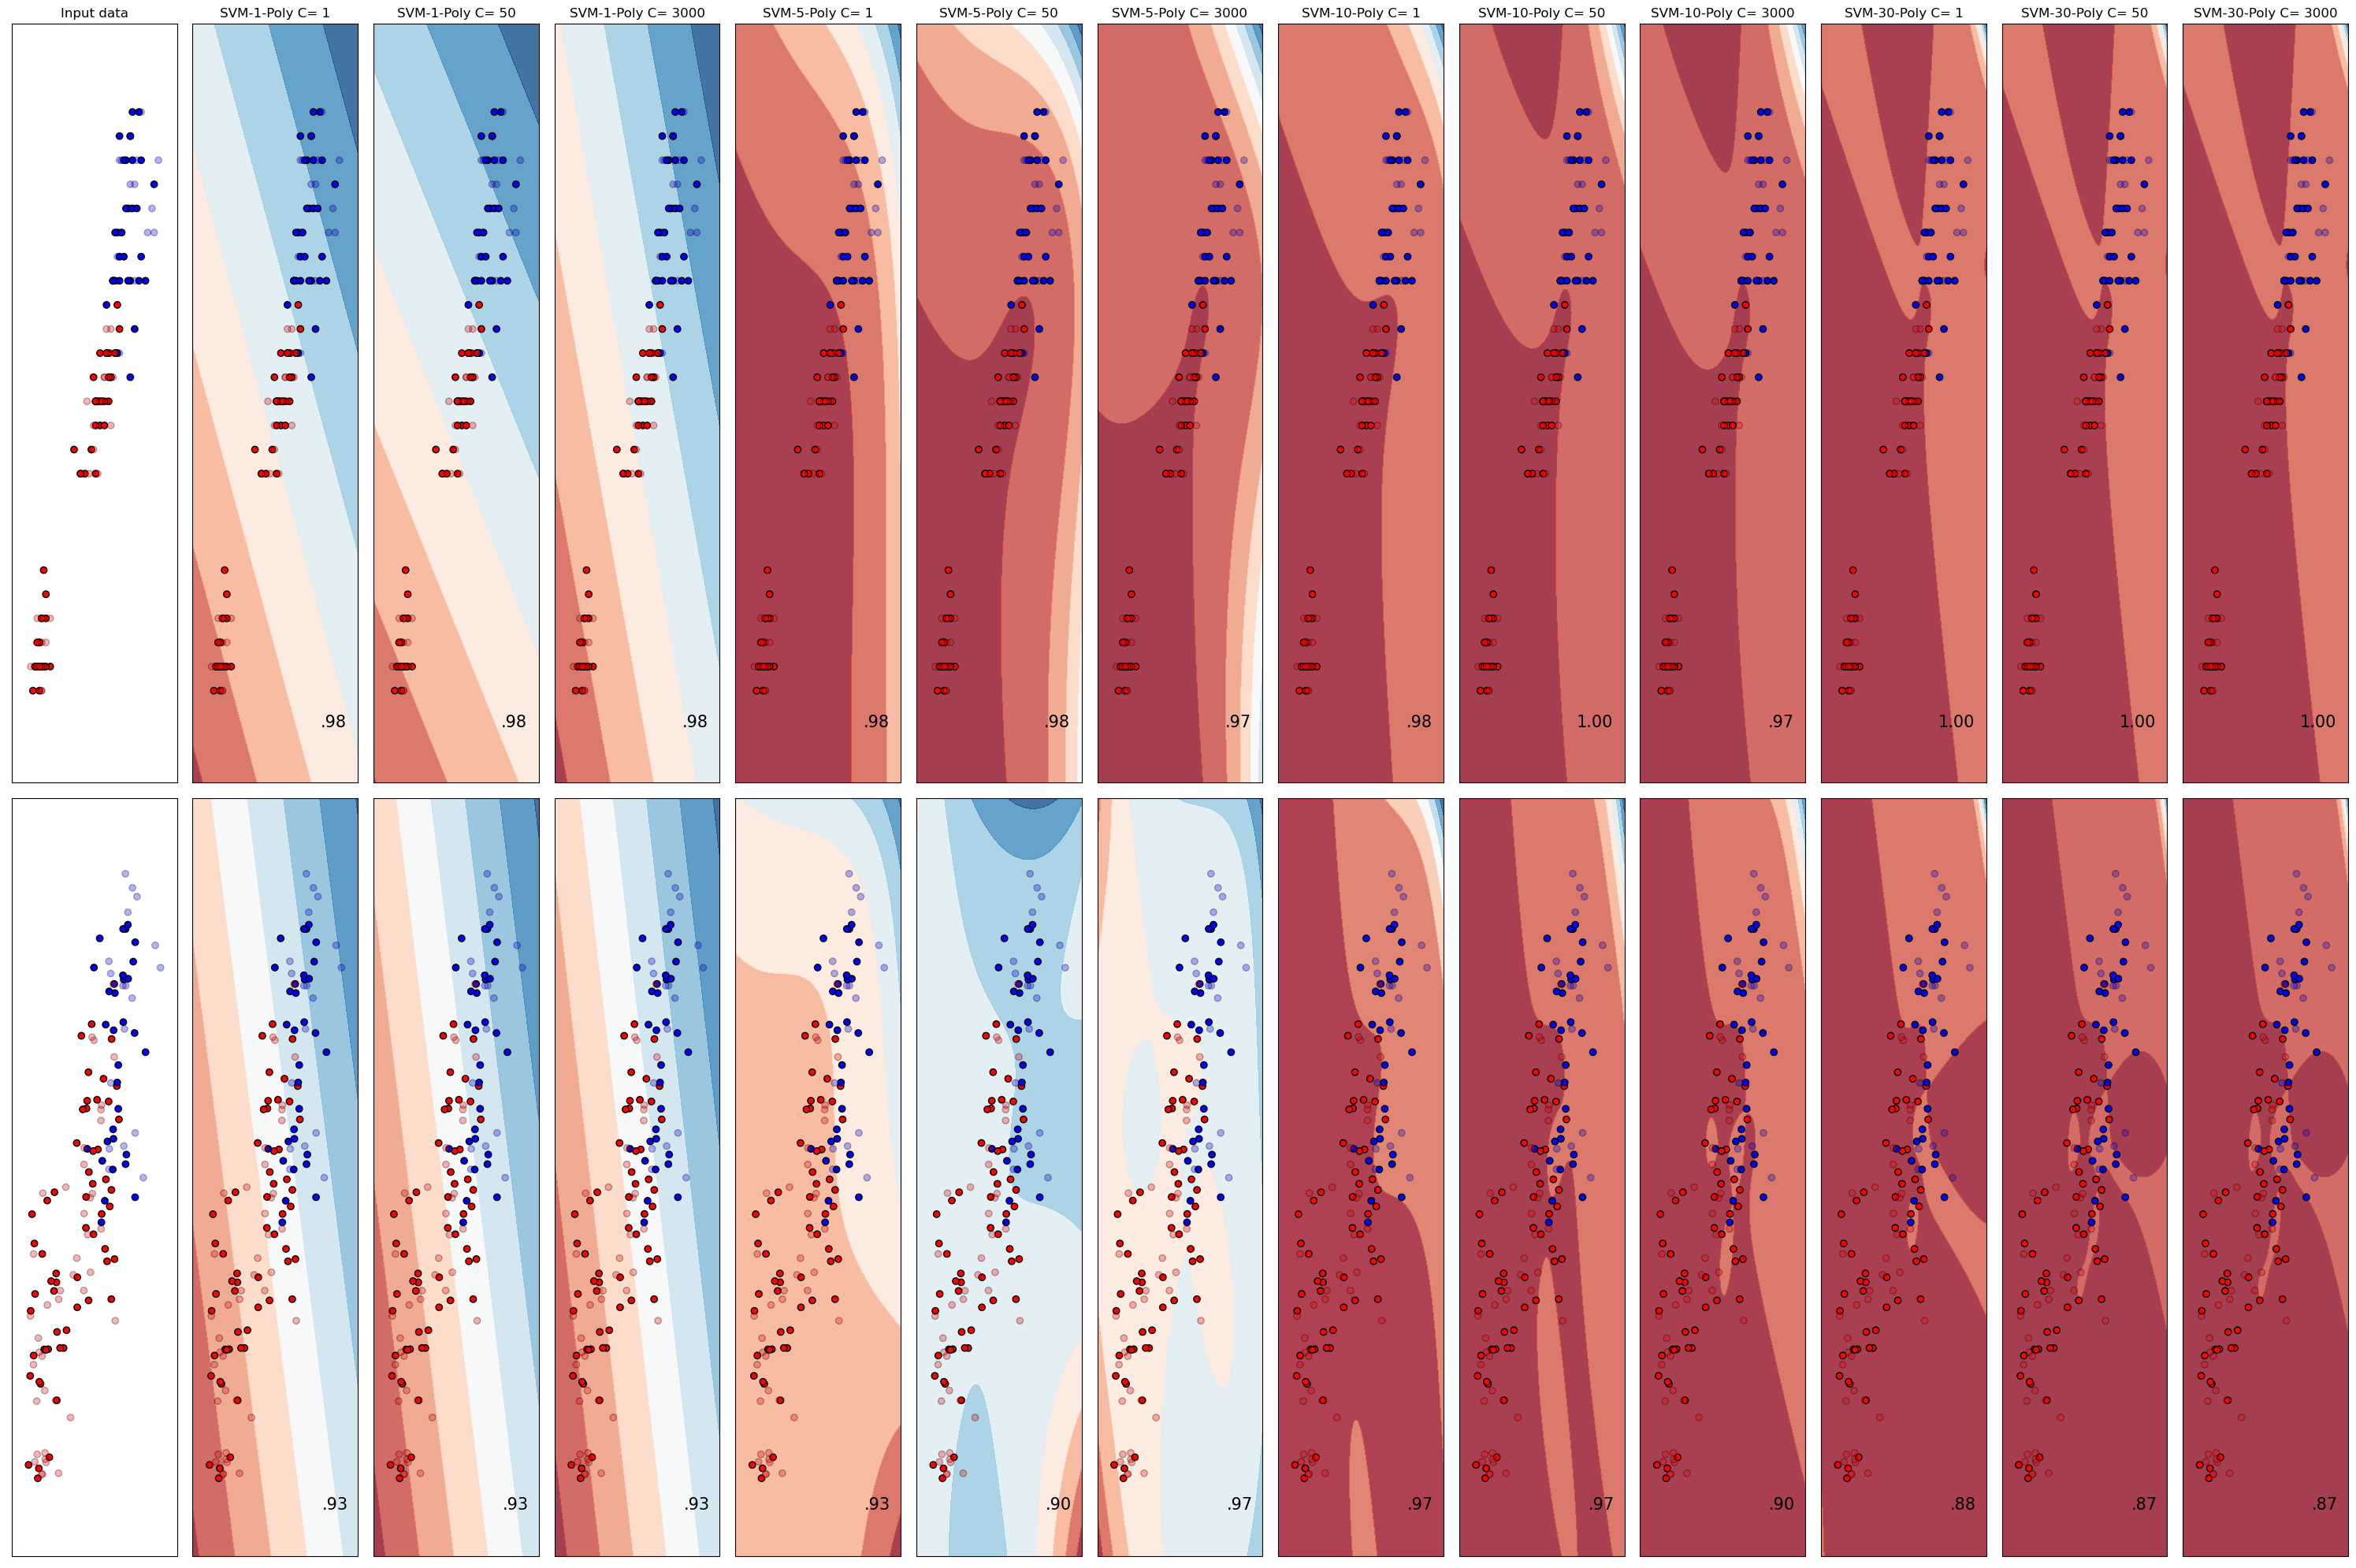

In [4]:
classifiers = []
names = []
for i in [1,5,10,30]: # degree values
    for j in [1,50,3000]: # c values
        classifiers.append(SVC(kernel='poly',degree=i, C=j, gamma='scale', coef0=1.0))
        names.append("SVM-"+str(i)+"-Poly "+"C= "+str(j))

plot_2d_examples(classifiers, names, others_datasets, figsize=(30,20))

In [5]:
# Best Score (degree:10 ,C:50)

In [6]:
# C:50 reasonable but C:3000 overfit you can see at degree 10 C:3000